In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import re

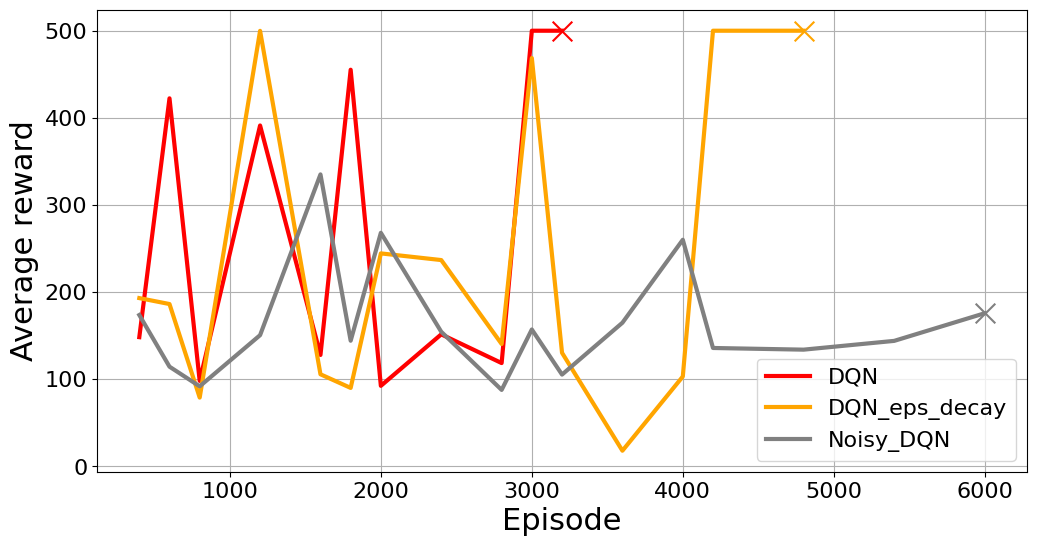

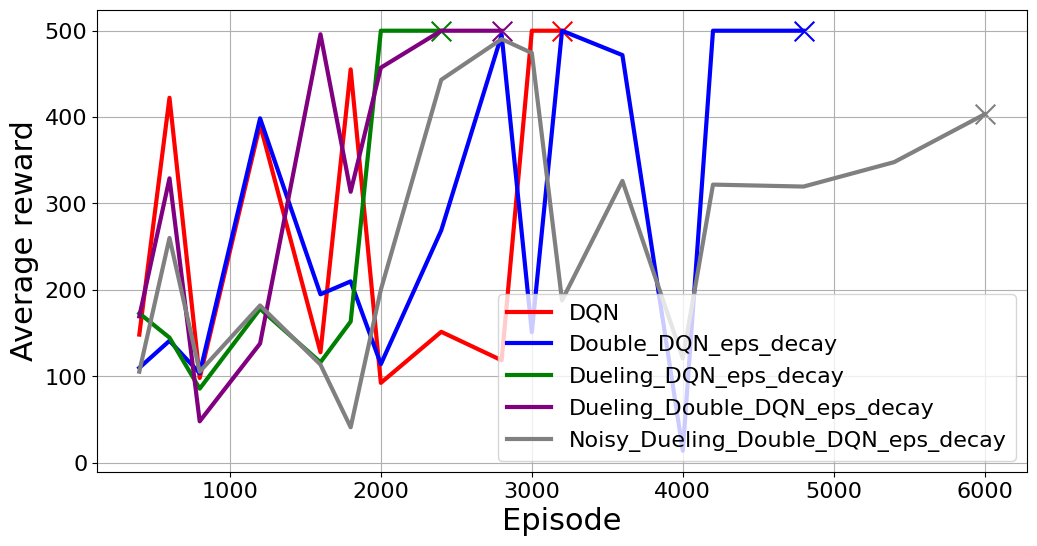

In [2]:
agents_group_1 = ["DQN", "DQN_eps_decay", "Noisy_DQN"]
agents_group_2 = ["DQN2", "Double_DQN_eps_decay", "Dueling_DQN_eps_decay", "Dueling_Double_DQN_eps_decay", "Noisy_Dueling_Double_DQN_eps_decay"]
all_agents = agents_group_1 + agents_group_2

agents_rewards = {agent: {"episodes": [], "mean_rewards": []} for agent in all_agents}
episode_pattern = re.compile(r'test_results_episode_(\d+)')

group_1_colors = ["red", "orange", "grey"]
group_2_colors = ["red", "blue", "green", "purple", "grey"]
agent_colors = {}

for i, agent in enumerate(agents_group_1):
    agent_colors[agent] = group_1_colors[i % len(group_1_colors)]
for i, agent in enumerate(agents_group_2):
    agent_colors[agent] = group_2_colors[i % len(group_2_colors)]

def plot_group(agents, filename, title):
    plt.figure(figsize=(12, 6))
    
    for agent in agents:
        stats_dir = f"{agent}/stats/pkl/"
        if not os.path.exists(stats_dir):
            continue
        
        pkl_files = sorted(
            [f for f in os.listdir(stats_dir) if f.startswith("test_results_episode_") and f.endswith(".pkl")],
            key=lambda x: int(episode_pattern.search(x).group(1))
        )
        
        consecutive_500 = 0
        stop_point = None
        
        for file_name in pkl_files:
            file_path = os.path.join(stats_dir, file_name)
            episode_number = int(episode_pattern.search(file_name).group(1).replace("01", "00"))
            
            with open(file_path, "rb") as f:
                data = pickle.load(f)
            
            mean_reward = np.mean(np.array(data))
            
            agents_rewards[agent]["episodes"].append(episode_number)
            agents_rewards[agent]["mean_rewards"].append(mean_reward)
            
            if mean_reward == 500:
                consecutive_500 += 1
            else:
                consecutive_500 = 0
            
            if consecutive_500 == 2:
                stop_point = (episode_number, mean_reward)
                break
        
        if agent == "DQN2": agent = "DQN"

        color = agent_colors[agent]
        plt.plot(agents_rewards[agent]["episodes"], agents_rewards[agent]["mean_rewards"], label=agent, color=color, linewidth=3)
        
        if stop_point:
            plt.scatter(*stop_point, color=color, marker='x', s=200)
        else:
            plt.scatter(agents_rewards[agent]["episodes"][-1], agents_rewards[agent]["mean_rewards"][-1], color=color, marker='x', s=200)
    
    plt.xlabel("Episode", fontsize=22)
    plt.ylabel("Average reward", fontsize=22)
    plt.grid()
    plt.legend(loc='lower right', fontsize=16)
    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.savefig(filename, bbox_inches='tight', pad_inches=0.1)
    plt.show()

plot_group(agents_group_1, "Cartpole_training_left.png", "Training Progress - Group 1")
plot_group(agents_group_2, "Cartpole_training_right.png", "Training Progress - Group 2")